In [11]:
import importlib

import settings
import VPINN_tri
import mesh_lib

import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
from GaussJacobiQuadRule_V3 import Jacobi, DJacobi, GaussLobattoJacobiWeights
import os 

importlib.reload(settings)
importlib.reload(mesh_lib)
importlib.reload(VPINN_tri)

from settings import *
from mesh_lib import *
from VPINN_tri import *



os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

settings_lib imported 
mesh_lib imported
VPINN_tri_lib  imported


In [12]:
pb = settings.PROBDEF((2*np.pi, 2*np.pi), 10)

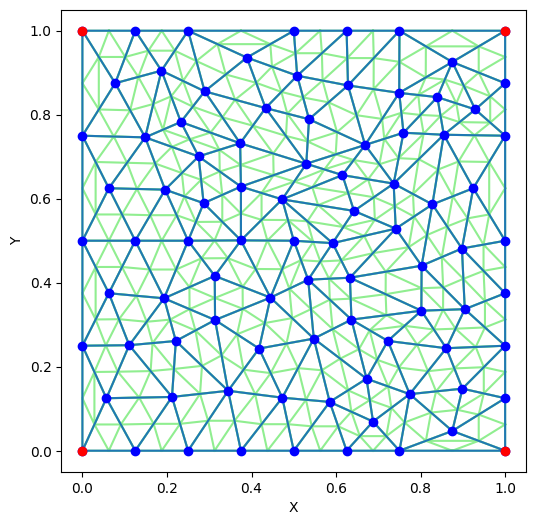

mesh info : 
  number of elements =  150
  H_max =  0.25
  H_min =  0.0895721626833764
  refinement ratio =  0.1791443253667523
submesh info : 
  number of elements =  4
  h_min =  0.04478608134168807


In [16]:
domain = [(0,0), (1,0), (1,1), (0,1)]
mesh=Mesh(domain,0.01,3)
mesh.plot_sub_mesh()
mesh.print_info()

# x, w = mesh.GLQ()
# x, y = np.array(x[:, 0]),np.array(x[:, 1])

# x = np.arange(0, 1, 0.01)

# v = pb.v(x, 0, 1)
# print(v[1])
# plt.plot(x, v)

# r = 1
# powers = []
# for i in range(r+1):
#     for j in range(r+1):
#         if i + j <= r:
#             powers.append((j,i))
# print(powers)

# tot = 0
# for a in powers:
#     tot += x**a[0] * 0**a[1]
#     print(tot)
# print(tot)


In [13]:

#degree used for test functions on small triangles 
r_tests = 5
#degree used interpolation on big triangles 
r_interolation =3



N_elements = [3, 5]
params = {'scheme': 'VPINNs',
            'NN_struct': [2] + [5] * 3 + [1],
            'var_form': 0,

            'n_elements': mesh._get_number_elements(),
            'n_sub_elements':mesh.meshed_elements[0]._get_number_elements(),

            'n_test': r_tests,
            'n_inter': r_interolation,

            'n_quad': 15,
            'n_bound': 80, #
            'n_residual': 100, #
            'domain': ((-1, -1), (1, 1)),
            'Opt_Niter': 10000 + 1,
            'delta_test': 0.01}

In [13]:
model = VPINN(pb, params, mesh)

In [14]:
NN = tf.keras.Sequential()
NN.add(tf.keras.layers.InputLayer(2))
# NN.add(tf.keras.layers.Lambda(lambda x: 2. * (x + 1) / (2) - 1.))

for width in 3*[5]:
    NN.add(tf.keras.layers.Dense(width,
                                    activation='tanh',
                                    use_bias=True,
                                    kernel_initializer='glorot_normal',
                                    bias_initializer='glorot_normal'))
NN.add(tf.keras.layers.Dense(1, activation='linear'))

model.set_NN(NN = NN, LR = 0.002)
#OR
# model.initialise_NN(structure = [2,20,20,20,20,1], LR = 0.001)

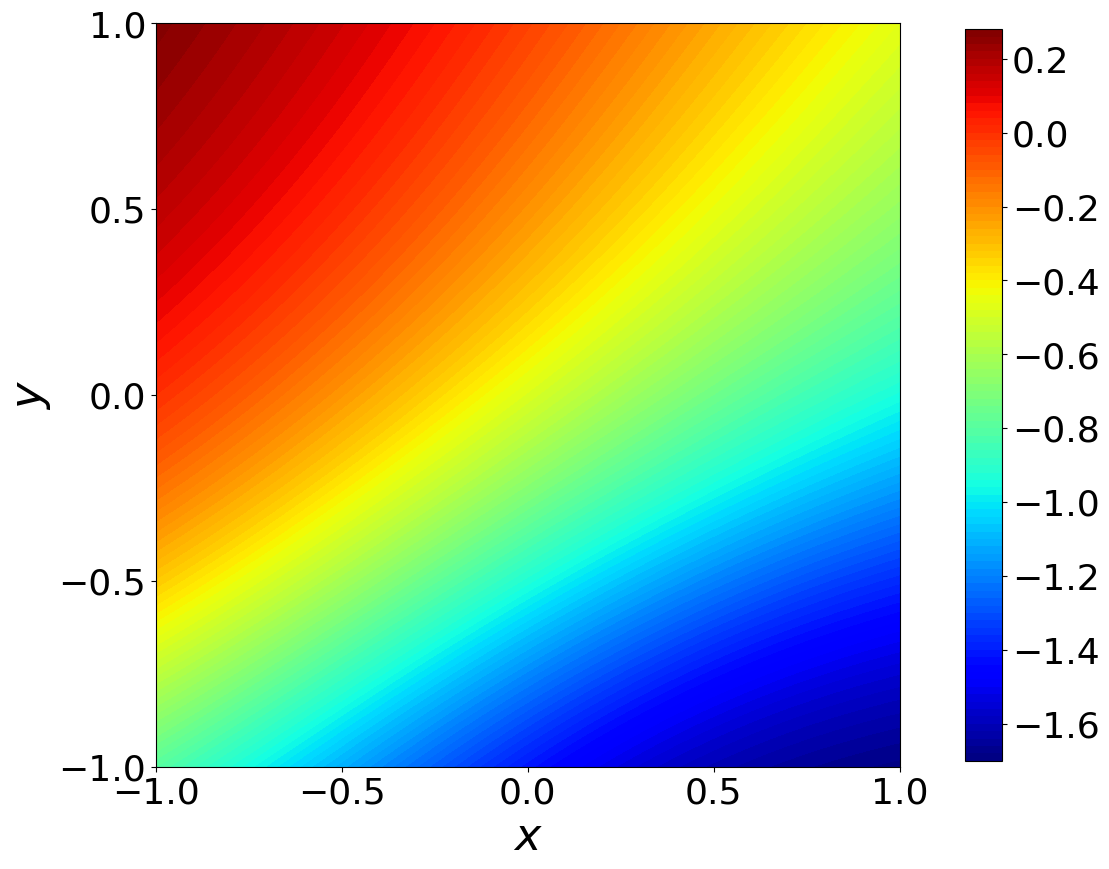

Tensor("add:0", shape=(225, 1), dtype=float32)
Tensor("add_2:0", shape=(225, 1), dtype=float32)
Tensor("add_4:0", shape=(225, 1), dtype=float32)
Tensor("add_6:0", shape=(225, 1), dtype=float32)
Tensor("add_8:0", shape=(225, 1), dtype=float32)
Tensor("add_10:0", shape=(225, 1), dtype=float32)
Tensor("add_12:0", shape=(225, 1), dtype=float32)
Tensor("add_14:0", shape=(225, 1), dtype=float32)
Tensor("add_16:0", shape=(225, 1), dtype=float32)
Tensor("add_18:0", shape=(225, 1), dtype=float32)
Tensor("add_20:0", shape=(225, 1), dtype=float32)
Tensor("add_22:0", shape=(225, 1), dtype=float32)
Tensor("add_24:0", shape=(225, 1), dtype=float32)
Tensor("add_26:0", shape=(225, 1), dtype=float32)
Tensor("add_28:0", shape=(225, 1), dtype=float32)
Iteration: 0 loss: 25.297096 time: 32.592461824417114
Iteration: 100 loss: 23.286983 time: 0.6190016269683838
Iteration: 200 loss: 15.801840 time: 0.5818080902099609
Iteration: 300 loss: 11.805634 time: 0.5860164165496826
Iteration: 400 loss: 10.111859 time

In [15]:
model.plot_prediction(False)
loss_his = model.train(params['Opt_Niter'])

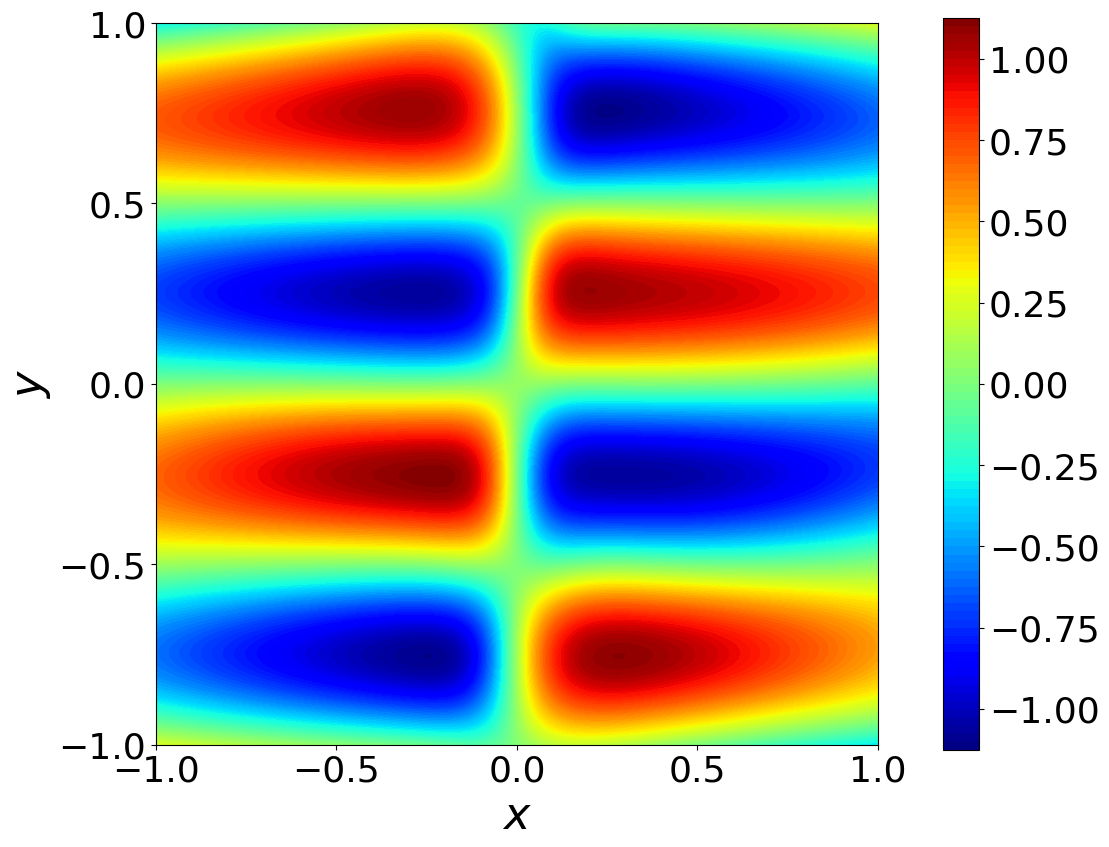

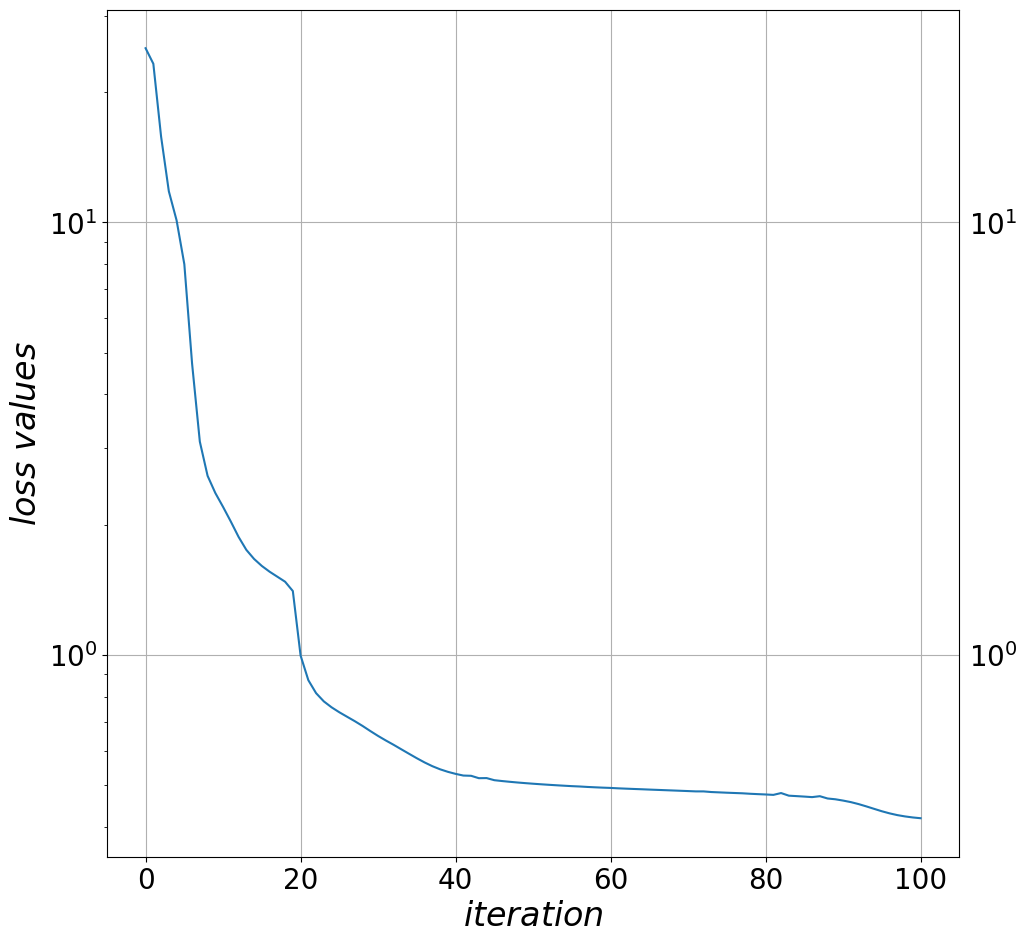

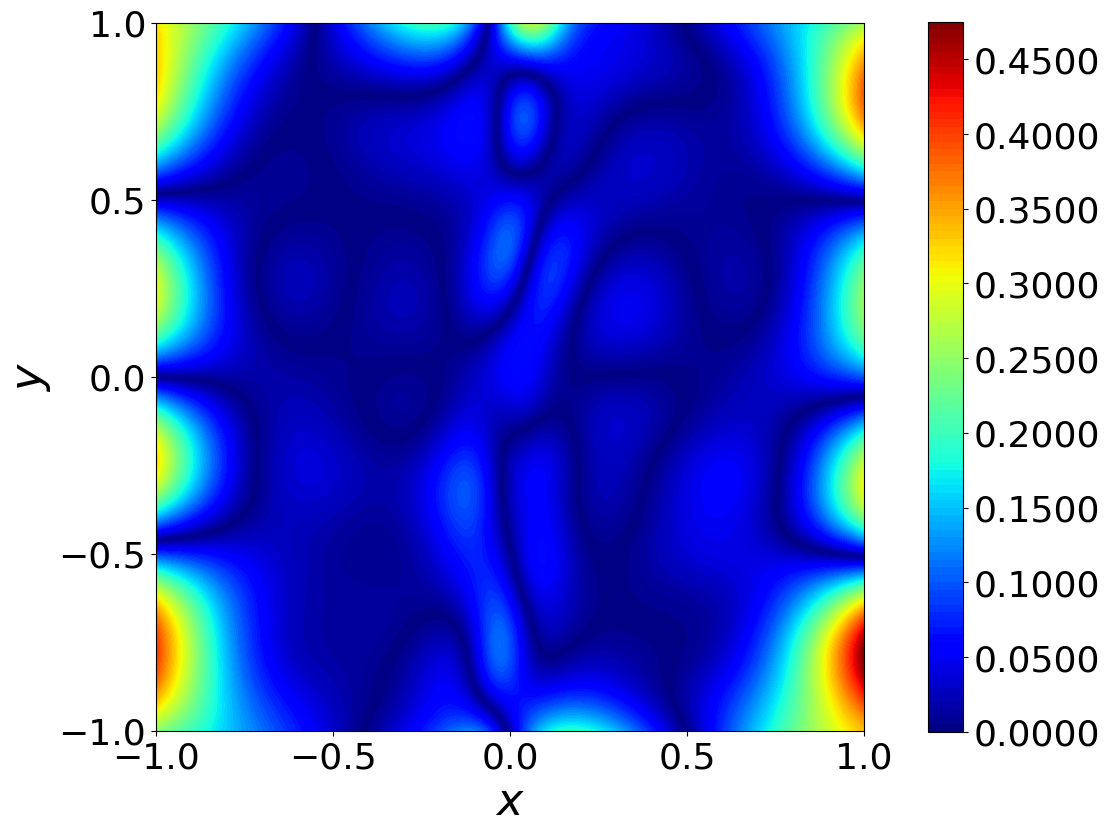

In [16]:
model.plot_prediction(False)
model.plot_loss_history(loss_his, False)
model.plot_pointwise_error(False)